# 결합, 주변, 조건부 확률 밀도 함수

두 개 이상의 확률 변수가 서로 관계를 가지며 존재하는 경우를 생각해 보자. 예를 들어 학교에 있는 학생의 키와 몸무게를 측정하는 경우 한 명의 학생 $\omega$에 대해 두 개의 자료 ($x$, $y$)가 한 쌍으로 나오게 된다. 이렇게 취득한 자료를 확률 변수 $X$와 $Y$로 볼 때, 이들의 확률 분포를 한번에 묘사하기 위한 확률 분포를 **결합 확률 분포(joint probability distribution)**라고 한다. 

결합 확률 분포도 단일 연속 확률 변수의 경우와 마찬가지로 누적 확률 분포 함수(cumulative probability function)와 확률 밀도 함수(probability density function)를 통해 서술된다.

## 연속 확률 변수의 결합 누적  확률 분포 함수

두 확률 변수 $X$, $Y$에 대한 누적 확률 분포 함수 $F_{XY}(x, y) $는 다음과 같이 정의한다.

$$ F_{XY}(x, y) = P(\{ X < x \} \cap \{ Y < y \}) = P(X < x, Y < y) $$

만약 구간의 끝을 나타내는 두 독립 변수 $x$, $y$중 하나가 무한대 값을 가지는 경우에는 해당 변수의 값은 어떤 값을 가져도 상관없으므로 남은 하나의 변수에 대한 누적 확률 분포 함수로 줄어든다. 이를 **주변 확률 분포(marginal probability distribution)**이라고 한다.

$$ F_X(x)=F_{XY}(x, \infty) $$

$$ F_Y(x)=F_{XY}(\infty, y) $$

누적 확률 분포 함수 $F_{XY}(x, y) $는 다음과 같은 특성을 가진다.

$$ F_{XY}(\infty, \infty)=1 $$

$$ F_{XY}(-\infty, y)=F_{XY}(x,-\infty)=0 $$

## 연속 확률 변수의 결합 확률 밀도 함수

단일 확률 변수의 경우처럼 누적 결합 확률 분포 함수를 미분하여 결합 확률 밀도 함수를 정의할 수 있다. 다만 이 경우에는 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 한다.

$$ f_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y} $$

결합 확률 밀도 함수를 특정 구간에 대해 적분하면 해당 구간에 대한 확률이 된다.

$$  \int_{x_1}^{x_2} \int_{y_1}^{y_2} f_{XY}(x,y)dxdy = P\big(\{ x_1 \leq X \leq x_2, \; y_1 \leq Y \leq y_2 \}\big)  $$

따라서 결합 확률 밀도 함수를 모든 변수에 대해 $-\infty$에서 $\infty$ 까지 적분하면 값이 1이 된다.

$$  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{XY}(x,y)dxdy=1 $$

연속 확률 변수의 결합 확률 밀도 함수는 2차원 함수가 된다. 아래는 다변수 정규 분포의 결합 확률 밀도의 예를 그린 것이다.

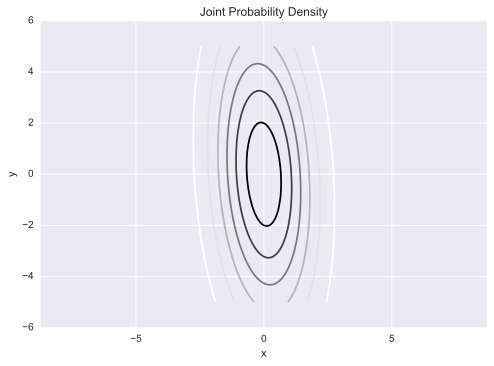

In [42]:
mu = [0, 0]
cov = [[2, -1],[-1, 18]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density")
plt.axis("equal")
plt.show()

동일한 결합 확률 밀도 함수를 3차원으로 그리면 아래와 같다.

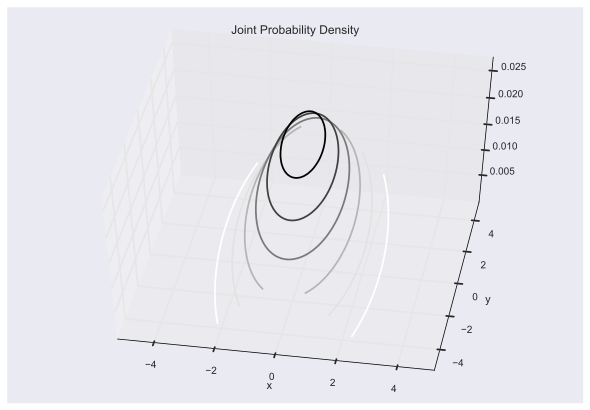

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Joint Probability Density")
ax.view_init(50, -80)
plt.show()

## 이산 확률 변수의 결합 확률 질량 함수

다변수 이산 확률 변수에 대해서는 결합 확률 질량 함수를 바로 구할 수 있다. 결합 확률 질량 함수는 모든 확률 변수의 값이 특정 숫자가 될 확률을 듯한다. 

$$ f_{XY}(x,y) = P(X=x,Y=y) $$

결합 확률 질량 함수는 댜음과 같이 2차원 표의 형태가 된다.

In [44]:
pmf = np.array([[0, 0, 0, 0, 1, 1],
                [0, 0, 1, 2, 1, 0],
                [0, 1, 3, 3, 1, 0],
                [0, 1, 2, 1, 0, 0],
                [1, 1, 0, 0, 0, 0]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.05,  0.05],
       [ 0.  ,  0.  ,  0.05,  0.1 ,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.15,  0.15,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.1 ,  0.05,  0.  ,  0.  ],
       [ 0.05,  0.05,  0.  ,  0.  ,  0.  ,  0.  ]])

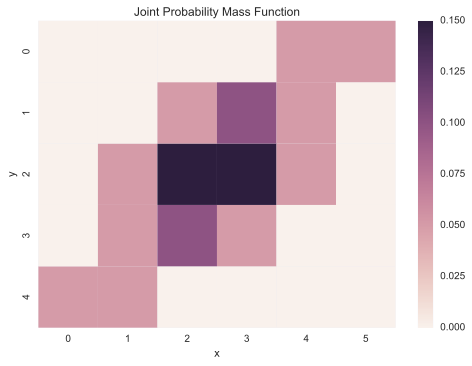

In [45]:
sns.heatmap(pmf)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function")
plt.show()

## 주변 확률 밀도 함수

**주변 확률 밀도 함수(marginal probability density function)**는 다변수 확률 밀도 함수를 특정한 하나의 변수에 대해 평균한 값을 말한다. 따라서 결합 확률 밀도 함수를 특정 변수에 대해서만 적분하여 구한다. 

평균 연산(적분)으로 인해 차원이 한 개 줄어들기 때문에 2차원 확률 변수의 주변 확률 밀도 함수는 1차원 함수가 된다.

$$ 
\begin{align}%\label{}
\nonumber  f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x,y)dy \\
\nonumber  f_Y(y) = \int_{-\infty}^{\infty} f_{XY}(x,y)dx
\end{align} 
$$

이산 확률 변수의 경우에는 **주변 확률 질량 함수(marginal probability mass function)** 를 다음과 같이 특정한 하나의 변수에 대해 총합을 구하여 정의한다

$$ 
\begin{align}%\label{}
\nonumber  f_X(x) = \sum_{y_j} f_{XY}(x,y_j) \\
\nonumber  f_Y(y) = \sum_{x_i} f_{XY}(x_i,y) \\
\end{align} 
$$

위에서 예로 든 이산 확률 변수의 경우에 주변 확률 질량 함수를 계산하면 다음과 같다.

In [46]:
pmf

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.05,  0.05],
       [ 0.  ,  0.  ,  0.05,  0.1 ,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.15,  0.15,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.1 ,  0.05,  0.  ,  0.  ],
       [ 0.05,  0.05,  0.  ,  0.  ,  0.  ,  0.  ]])

In [47]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([ 0.05,  0.15,  0.3 ,  0.3 ,  0.15,  0.05])

In [48]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[ 0.1],
       [ 0.2],
       [ 0.4],
       [ 0.2],
       [ 0.1]])

위에서 예로 든 연속 확률 변수의 경우에 주변 확률 밀도 함수를 계산하면 다음과 같다.

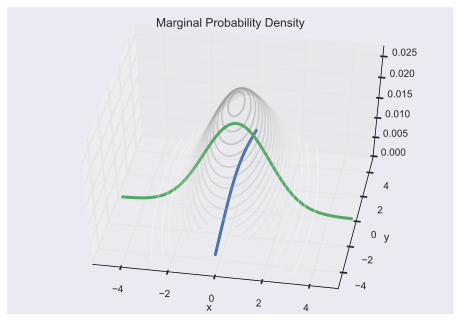

In [62]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour(XX, YY, ZZ, levels=np.linspace(0, 0.04, 30), alpha=0.3)
ax.plot(yy, ZZ.mean(axis=1), zdir='x', lw=3)
ax.plot(xx, ZZ.mean(axis=0), zdir='y', lw=3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Marginal Probability Density")
ax.view_init(50, -80)
plt.show()

## 조건부 확률 밀도 함수

조건부 확률 밀도 함수(conditional probability density function)는 다변수 확률 변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, 나머지 변수에 대한 확률 밀도 함수를 말한다. 


$$ f_{X \mid Y}(x \mid y_0) = \dfrac{f_{XY}(x, y=y_0)}{f_{Y}(y_0)} $$

$$ f_{Y \mid X}(y \mid x_0) = \dfrac{f_{XY}(x, y=y_0)}{f_{X}(x_0)} $$


주변 확률 밀도 함수와 마찬가지로 차원이 감소하지만 평균 연산(적분)으로 변수가 없어진 주변 확률 밀도 함수와는 값이 달라진다.

이산 확률 변수의 경우에는 조건부 확률 질량 함수를 사용하여 정의한다.

위에서 예로 든 이산 확률 변수의 경우에 조건부 확률 질량 함수를 계산하면 다음과 같다.

In [50]:
pmf

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.05,  0.05],
       [ 0.  ,  0.  ,  0.05,  0.1 ,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.15,  0.15,  0.05,  0.  ],
       [ 0.  ,  0.05,  0.1 ,  0.05,  0.  ,  0.  ],
       [ 0.05,  0.05,  0.  ,  0.  ,  0.  ,  0.  ]])

In [51]:
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y0

array([ 0. ,  0. ,  0. ,  0. ,  0.5,  0.5])

In [52]:
cond_y1 = pmf[1, :]/pmf_marginal_y[1]
cond_y1

array([ 0.  ,  0.  ,  0.25,  0.5 ,  0.25,  0.  ])